In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/home/ai/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


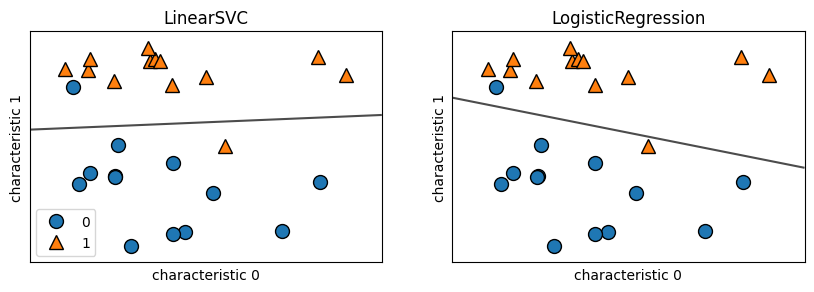

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes=plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("characteristic 0")
    ax.set_ylabel("characteristic 1")
axes[0].legend()

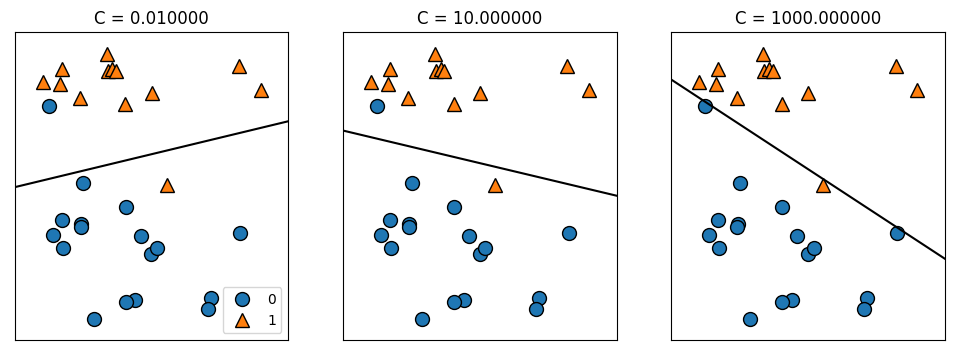

In [12]:
mglearn.plots.plot_linear_svc_regularization()

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg= LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test,y_test)))

training set score: 0.958
test set score: 0.958


In [38]:
logreg10= LogisticRegression(C=10,max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg10.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg10.score(X_test,y_test)))

training set score: 0.969
test set score: 0.965


In [21]:
logreg100= LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

training set score: 0.984
test set score: 0.965


In [22]:
logreg001= LogisticRegression(C=0.01,max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

training set score: 0.953
test set score: 0.951


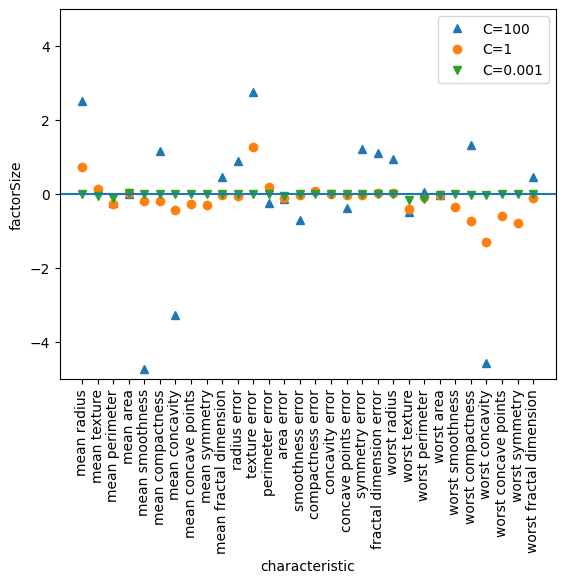

In [39]:

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("characteristic")
plt.ylabel("factorSize")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


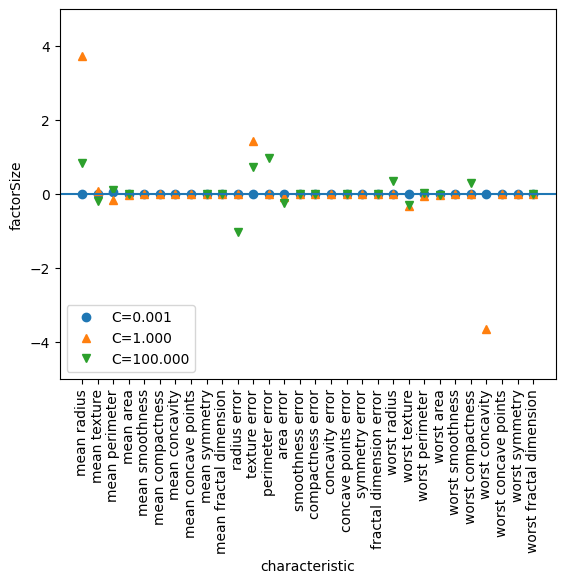

In [37]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("characteristic")
plt.ylabel("factorSize")

plt.ylim(-5,5)
plt.legend(loc=3)